In [3]:
import pandas as pd
from safegraph_py_functions import safegraph_py_functions as sgpy
import os
from dotenv import load_dotenv, find_dotenv
from loguru import logger
from src import DATA_DIR

In [164]:
pd.options.display.max_columns = 999

In [4]:
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)
raw_data_dir = DATA_DIR / 'raw'

In [5]:
# if import is 0 it reads the data from the existing file
# otherwise reads in the raw data an makes a unified dataset
IMPORT = 0 

In [6]:
# Read in all patterns files in the monthly-patterns folder
def get_files():
    patterns_path = raw_data_dir / "monthly-patterns"
    files = []
    for f in patterns_path.glob("**/*.csv.gz"):
        files.append(f)
    return files

In [165]:
def filter_to_philly(df):
    # zip codes are read as integers rather than strings so we add leading zeros.
    # this is not strictly necessary since Philadelphia zipcodes don't have leading zeros.
    
    # Philadelphia selection
    # HK: adding leading zeros because some zipcodes in MA are 0191X.
    df['postal_code'] = df['postal_code'].apply(lambda x: ('00000'+str(x))[-5:])
    in_philly = df['postal_code'].astype(str).str.startswith("191")
    df = df.loc[in_philly]
    df = df[['safegraph_place_id','date_range_start','postal_code', 
             'raw_visit_counts', 'raw_visitor_counts']]
    
    return df

In [332]:
if IMPORT == 1:
    philly_patterns = []
    files = get_files()
    for i, f in enumerate(files):
        print(f)
        philly_patterns.append(filter_to_philly(pd.read_csv(f)))
    philly_patterns = pd.concat(philly_patterns)
    philly_patterns.to_csv(
        DATA_DIR / "processed" / "kmeans_patterns.csv.tar.gz", index=False
    )
else:
    philly_patterns_all = pd.read_csv(
        DATA_DIR / "processed" / "philly_patterns.csv.tar.gz", low_memory=False
    )

In [333]:
philly_patterns_all.head()

,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,top_category,sub_category,category_tags,naics_code,latitude,longitude,iso_country_code,phone_number,open_hours,opened_on,closed_on,tracking_opened_since,tracking_closed_since
0,22m-223@628-p8h-nbk,sg:05ede5a3192b44638dcd954d369b4856,NaN,NaN,Save-A-Lot,6801 Frankford Ave,Philadelphia,PA,19135,SG_BRAND_c5a2c9092cad648bc1ee9c9be08f83ab,Save-A-Lot,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,164.0,127.0,"[3,8,4,4,6,6,6,13,5,5,3,6,5,6,3,10,6,5,3,11,6,...",4.210103e+11,"{""420912019014"":5,""421010315012"":5,""4210103150...","{""421010319005"":6,""421010349001"":5,""4210103150...","{""US"":121}",1408.0,17.0,"{""<5"":11,""5-10"":50,""11-20"":38,""21-60"":56,""61-1...","{""Planet Fitness"":16,""Petco"":10}","{""ShopRite"":53,""Wawa"":48,""Dunkin'"":42,""Dollar ...","[0,0,0,0,0,3,2,8,6,12,15,20,30,22,20,17,25,14,...","{""Monday"":25,""Tuesday"":31,""Wednesday"":19,""Thur...","{""android"":82,""ios"":44}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22b-222@628-p7b-vmk,sg:1501a801e04b4615b1af620ccf1a2e48,NaN,NaN,CARQUEST Auto Parts,3093 Holme Ave,Philadelphia,PA,19136,SG_BRAND_ed5a1ef3e85b774022eb505cf6f184ee,CARQUEST Auto Parts,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,2.0,2.0,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0...",4.210103e+11,{},{},{},NaN,29.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...",{},"{""Wawa"":99,""Dunkin'"":97,""The Fresh Works"":50,""...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222-222@628-p9k-y9z,sg:1d184d77616941d2afa14b4d3831d7e4,NaN,NaN,Extra Space Storage,11501 Roosevelt Blvd,Philadelphia,PA,19154,SG_BRAND_25f99d0cc5d6078042c8f466f6a8fa83,Extra Space Storage,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,27.0,18.0,"[2,0,1,1,0,1,2,0,1,0,1,0,0,1,1,2,0,1,0,2,1,3,3...",4.210198e+11,"{""421010301004"":4,""421010336005"":4,""4209120150...","{""421010345011"":4,""420171014033"":4,""4210103530...","{""US"":17}",6462.0,15.0,"{""<5"":0,""5-10"":9,""11-20"":9,""21-60"":6,""61-120"":...",{},"{""Wawa"":66,""Dunkin'"":63,""CVS"":45,""Sunoco"":42,""...","[1,2,2,1,0,0,0,0,1,3,6,2,4,2,2,3,4,6,2,0,0,0,0,1]","{""Monday"":6,""Tuesday"":6,""Wednesday"":1,""Thursda...","{""android"":12,""ios"":6}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22j-222@628-pgj-3yv,sg:359580c4d0c24a3aae50813992af8b35,NaN,NaN,La Cienaga Deli Grocery,601 Cecil B Moore Ave,Philadelphia,PA,19122,NaN,NaN,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,12.0,11.0,"[0,1,0,0,0,1,0,0,0,0,0,0,1,1,2,1,0,0,1,1,1,0,0...",4.210101e+11,"{""060290028132"":4}","{""060371012101"":4}","{""US"":6}",16608.0,119.0,"{""<5"":0,""5-10"":2,""11-20"":2,""21-60"":1,""61-120"":...",{},"{""Brightside Academy"":9,""United Refrigeration""...","[1,1,1,3,3,6,5,4,3,3,2,2,2,1,1,0,0,0,0,0,0,0,0,1]","{""Monday"":2,""Tuesday"":2,""Wednesday"":0,""Thursda...","{""android"":11,""ios"":0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222-223@628-pzn-zfz,sg:6255ef7faad24ed6a77887c62294abcb,NaN,NaN,Brian Cesar Remax 2000,14500 Bustleton Ave,Philadelphia,PA,19116,NaN,NaN,2021-02-01T00:00:00-05:00,2021-03-01T00:00:00-05:00,3.0,3.0,"[0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",4.210104e+11,"{""421010363033"":4}","{""421010363033"":4}",{},NaN,40.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...",{},"{""Net Cost Market"":33,""Radiator"":33,""Philly Pr...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0]","{""Mo

Number of unique safegraph ids:

In [334]:
philly_patterns_all['safegraph_place_id'].nunique()

24390

Get POIs with category info:

In [335]:
categories = (
    philly_patterns_all.dropna(subset=["top_category"])
    .drop_duplicates(subset=["safegraph_place_id", "top_category"])
    .sort_values("date_range_start", ascending=False)
    .drop_duplicates(subset=["safegraph_place_id"])
)[["safegraph_place_id", "top_category"]]

In [336]:
categories.head()

,safegraph_place_id,top_category
71707,sg:0c38b4babff44be89a882f055247984a,Elementary and Secondary Schools
87715,sg:9e77c1e0a2e54a42b78de85a9b020c59,Child Day Care Services
87735,sg:50b7fe69cdc8481b937cf9ecac7d9606,Depository Credit Intermediation
87733,sg:1afd843ec3ae49b8a8691b4b99721ffd,Shoe Stores
87732,sg:1ada4ff9e9404fa5bcb6ae02f60b7eda,Florists


Number of POI with category info:

In [337]:
categories['safegraph_place_id'].nunique()

23441

Merge in category info and drop those without a category:

In [418]:
philly_patterns = philly_patterns_all.drop(labels=["top_category"], axis=1).merge(
    categories, on="safegraph_place_id"
)

No more missing categories:

In [419]:
philly_patterns['top_category'].isnull().sum()

0

Trim to the columns we need:

In [420]:
philly_patterns = philly_patterns[
    [
        "safegraph_place_id",
        "date_range_start",
        "date_range_end",
        "raw_visit_counts",
        "raw_visitor_counts",
        "poi_cbg",
        "top_category",
    ]
]

Make datetime columns:

In [421]:
philly_patterns["date_range_start"] = pd.to_datetime(
    philly_patterns["date_range_start"].astype(str).apply(lambda x: x[:10])
)

philly_patterns["date_range_end"] = pd.to_datetime(
    philly_patterns["date_range_end"].astype(str).apply(lambda x: x[:10])
)

In [422]:
# philly_patterns["poi_cbg"] = philly_patterns["poi_cbg"].astype(int)

In [423]:
# census_path = DATA_DIR / 'raw' / 'open-census-data'
# files = [file for file in census_path.glob('**/cbg_b19.csv')]
# census = pd.read_csv(files[0])
# census =  census[['census_block_group','B19013e1']]

In [424]:
# philly_patterns = philly_patterns.merge(census, left_on = 'poi_cbg', right_on = 'census_block_group', how = 'left')
# philly_patterns.drop(columns = 'census_block_group', inplace = True)

In [425]:
# philly_patterns['income_missing'] = philly_patterns['B19013e1'].isna().astype(int)
# philly_patterns['B19013e1'].fillna(value=philly_patterns['B19013e1'].mean(), inplace=True)

In [426]:
# for files with information disaggregated at the state level, keep only the country-wide info
def keep_total_level(norm_stats):
    if "region" in norm_stats.columns:
        if len(norm_stats[norm_stats["region"] == "ALL_STATES"]) == 0:
            raise ValueError('no region named "ALL_STATES"')
        norm_stats = norm_stats[norm_stats["region"] == "ALL_STATES"]
        norm_stats = norm_stats.drop(columns=["region"])
    return norm_stats


patterns_path = raw_data_dir / "monthly-patterns-2020-12"


norm_files = [f for f in patterns_path.glob("**/normalization_stats.csv")]
# read in normalization data
norm_stats = pd.concat([keep_total_level(pd.read_csv(file)) for file in norm_files])
norm_stats["year"] = norm_stats["year"].astype(int)
norm_stats["month"] = norm_stats["month"].astype(int)
norm_stats["day"] = norm_stats["day"].astype(int)
# HK: I only downloaded patterns data from 2019 onwards due to memory constraints
norm_stats = norm_stats[norm_stats["year"] >= 2019]
norm_stats.reset_index(inplace=True, drop=True)

In [427]:
norm_stats.head()

,year,month,day,total_visits,total_devices_seen,total_home_visits,total_home_visitors
0,2019,3,1,71494424,20818199,29867861,17558627
1,2019,3,2,64944421,20621293,28759442,17376856
2,2019,3,3,57808859,20708026,30021148,18297714
3,2019,3,4,66366221,20974271,30616720,18126681
4,2019,3,5,66513792,20246899,29591990,17466477


In [428]:
norm_stats["date"] = pd.to_datetime(
    (norm_stats.year * 10000 + norm_stats.month * 100 + norm_stats.day).apply(str),
    format="%Y%m%d",
)

In [429]:
date_ranges = (
    philly_patterns[["date_range_start", "date_range_end"]]
    .drop_duplicates()
    .sort_values("date_range_start")
    .reset_index(drop=True)
    .dropna()
)

In [430]:
date_ranges

,date_range_start,date_range_end
0,2019-01-01,2019-02-01
1,2019-02-01,2019-03-01
2,2019-03-01,2019-04-01
3,2019-04-01,2019-05-01
4,2019-05-01,2019-06-01
5,2019-06-01,2019-07-01
6,2019-07-01,2019-08-01
7,2019-08-01,2019-09-01
8,2019-09-01,2019-10-01
9,2019-10-01,2019-11-01


In [431]:
def get_date_range(x): 
    mask = (date_ranges['date_range_start'] <= x) & (date_ranges['date_range_end'] > x)
    return date_ranges.loc[mask,'date_range_start'].values[0]

In [432]:
norm_stats['date_range_start'] = norm_stats.date.apply(get_date_range)

In [433]:
norm_stats = norm_stats[['date_range_start', 'total_visits', 'total_devices_seen']].groupby('date_range_start').agg('sum').reset_index()

In [434]:
philly_patterns = philly_patterns.merge(norm_stats, on="date_range_start")
philly_patterns["visit_count_norm"] = (
    1000000 * philly_patterns["raw_visit_counts"] / philly_patterns["total_visits"]
)
philly_patterns["visitor_count_norm"] = (
    1000000
    * philly_patterns["raw_visitor_counts"]
    / philly_patterns["total_devices_seen"]
)

In [435]:
philly_patterns.head()

,safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,poi_cbg,top_category,total_visits,total_devices_seen,visit_count_norm,visitor_count_norm
0,sg:05ede5a3192b44638dcd954d369b4856,2021-02-01,2021-03-01,164.0,127.0,4.210103e+11,Grocery Stores,1332355928,433019771,0.123090,0.293289
1,sg:1501a801e04b4615b1af620ccf1a2e48,2021-02-01,2021-03-01,2.0,2.0,4.210103e+11,"Automotive Parts, Accessories, and Tire Stores",1332355928,433019771,0.001501,0.004619
2,sg:359580c4d0c24a3aae50813992af8b35,2021-02-01,2021-03-01,12.0,11.0,4.210101e+11,Grocery Stores,1332355928,433019771,0.009007,0.025403
3,sg:742859488f4948eba798dad18c70ef75,2021-02-01,2021-03-01,122.0,75.0,4.210103e+11,Restaurants and Other Eating Places,1332355928,433019771,0.091567,0.173202
4,sg:84e37b6cbfbf4e55a3ff4bdf81724eba,2021-02-01,2021-03-01,1.0,1.0,4.210103e+11,Depository Credit Intermediation,1332355928,433019771,0.000751,0.002309


#### Tests

In [436]:
philly_patterns.top_category.value_counts().head(n=20)

Restaurants and Other Eating Places                     98901
Religious Organizations                                 50621
Grocery Stores                                          22780
Child Day Care Services                                 21703
Personal Care Services                                  18150
Health and Personal Care Stores                         17253
Automotive Repair and Maintenance                       16844
Other Amusement and Recreation Industries               16091
Elementary and Secondary Schools                        13400
Museums, Historical Sites, and Similar Institutions     13112
Drinking Places (Alcoholic Beverages)                   12372
Offices of Physicians                                   11392
Clothing Stores                                          8818
Offices of Dentists                                      7984
Offices of Other Health Practitioners                    7561
Gasoline Stations                                        6682
Other Mi

Let's check restaurants:

In [437]:
restaurants = philly_patterns.query(
    "top_category == 'Restaurants and Other Eating Places'"
)

<AxesSubplot:xlabel='date_range_start'>

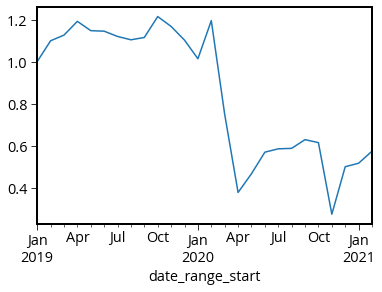

In [468]:
X = restaurants.groupby("date_range_start")["visitor_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

<AxesSubplot:xlabel='date_range_start'>

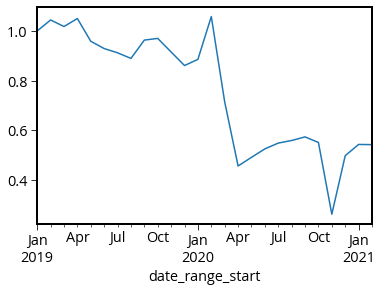

In [467]:
X = restaurants.groupby("date_range_start")["visit_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

Let's check grocery stores:

In [439]:
grocery_stores = philly_patterns.query("top_category == 'Grocery Stores'")

<AxesSubplot:xlabel='date_range_start'>

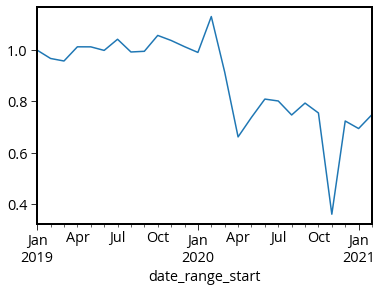

In [440]:
X = grocery_stores.groupby("date_range_start")["visitor_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

**Note: "visit_count_norm" seems weird!**

<AxesSubplot:xlabel='date_range_start'>

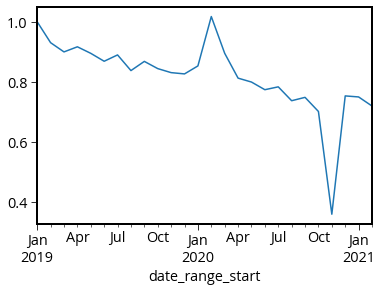

In [469]:
X = grocery_stores.groupby("date_range_start")["visit_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

#### Analysis

In [473]:
mask = philly_patterns['date_range_start'] < '2020-03-01' 
prepandemic = philly_patterns.loc[mask].copy()
pandemic = philly_patterns.loc[~mask].copy()

In [474]:
prepandemic.date_range_start.unique()

array(['2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [475]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [476]:
def cut_outliers(df, cols):
    for col in cols:
        ub = 2*df[col].quantile(0.99)
        mask = df[col] > ub
        df.loc[mask,col] = ub
    return df

def make_dummies(df, cols):
    return pd.get_dummies(df)
    

def Stdrshp(df, pivot_cols, constant_cols): 
    constant = df.loc[
        df.groupby('safegraph_place_id').cumcount() == 0,
        ['safegraph_place_id']+constant_cols
    ]
    constant.set_index('safegraph_place_id', inplace = True)
    #constant = make_dummies(constant, pivot_cols)
    pivoted = df.pivot_table(index='safegraph_place_id',columns='date_range_start')[pivot_cols]
    new_cols = [('{1} {0}'.format(*tup)) for tup in pivoted.columns]
    pivoted.columns = new_cols
    df = pivoted.join(constant)
    df = df.fillna(0)
    scaled = StandardScaler().fit_transform(df)
    scaled_features_df = pd.DataFrame(scaled, index=df.index, columns=df.columns)
    return scaled_features_df

def make_clusters(df, k = 5):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(df) # NH NOTE: USE HIGHER N_INIT TO AVOID RANDOMNESS
    df['cluster'] = kmeans.labels_
    return (df, kmeans.inertia_)

def run_Kmeans(df, pivot_cols, constant_cols, k = 5):
    normalized = Stdrshp(cut_outliers(df, pivot_cols), pivot_cols, constant_cols)
    return make_clusters(normalized, k)

In [477]:
pivot_cols = ["visitor_count_norm"] ## NH NOTE: try using visitor_count_norm only
constant_cols = []  #'B19013e1','income_missing']

In [480]:
import matplotlib.pyplot as plt

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


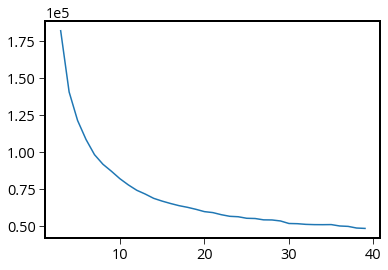

In [481]:
scaled = Stdrshp(philly_patterns, pivot_cols, constant_cols)
n_clusters = [k for k in range(3,40)]
inertias = []
for k in n_clusters:
    print(k)
    df, inertia = make_clusters(scaled, k = k)
    inertias.append(inertia)
    
plt.plot(n_clusters,inertias)

In [482]:
from kneed import KneeLocator

In [483]:
# Initialize the knee algorithm
kn = KneeLocator(n_clusters, inertias, curve='convex', direction='decreasing')

In [484]:
OPTIMAL_CLUSTERS = kn.knee
OPTIMAL_CLUSTERS

11

In [485]:
philly_patterns_clustered, pandemic_inertia = run_Kmeans(
    philly_patterns, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
)

In [486]:
# prepandemic, prepandemic_inertia = run_Kmeans(
#     prepandemic, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
# )
# pandemic, pandemic_inertia = run_Kmeans(
#     philly_patterns, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
# )

In [487]:
combined = philly_patterns_clustered.copy()

In [449]:
# # We want to compare pandemic_inertia to the inertia we would have in 2020 if we used the
# # 2019 clustering
# combined = pandemic.join(prepandemic[['cluster']], how='left',rsuffix='pre')
# combined[['clusterpre']] = combined[['clusterpre']].fillna(value=-1)
# combined['clusterpre'] = combined['clusterpre'].astype(int)

In [488]:
cols = combined.columns
cols = cols[:-2]
n = len(combined.columns)

In [490]:
def get_inertia(df, cols, cluster_col):
    mask = df[cluster_col] > -1
    n = len(df.index)
    filtered = df[mask]
    m = len(filtered.index)
    se = ((df[cols] - df.groupby(cluster_col)[cols].transform('mean'))**2).to_numpy().sum()
    return se*(n/m)

get_inertia(combined, cols, 'cluster')

73123.56793536409

In [491]:
#worst case scenario
combined['newcol'] = 1
get_inertia(combined, cols, 'newcol')

505374.9999999998

In [492]:
combined.groupby('cluster').size()

cluster
0     10650
1       178
2      5633
3        56
4       199
5      2297
6       566
7       505
8        53
9        62
10       16
dtype: int64

In [493]:
# combined.groupby('clusterpre').size()

**NH**: Plot the mean value over time by cluster

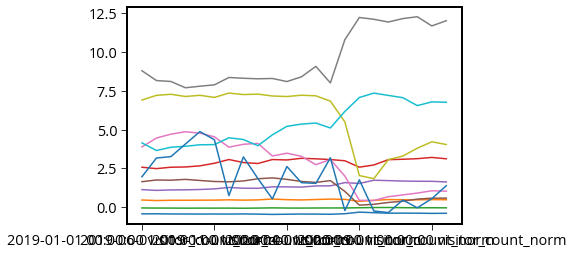

In [495]:
fig, ax = plt.subplots()
for cluster_num in combined['cluster'].unique():
    cluster = combined.query(f"cluster == {cluster_num}")
    cluster[cluster.columns[:-6]].T.mean(axis=1).plot(ax=ax, legend=False)

**NH:** seems like it sort of worked in terms of differentiating both by overall foot traffic and the shape of the traffic over time

In [312]:
big_cats = philly_patterns.groupby('top_category').size().sort_values(ascending = False)[:5]

In [313]:
big_cats = big_cats.index

In [314]:
def category_groups(x):
    if x in big_cats: 
        return x 
    else: 
        return 'other'

In [315]:
philly_patterns['top_category_simple'] = philly_patterns.top_category.apply(category_groups)

In [316]:
philly_patterns['top_category_simple'].unique()

array(['Grocery Stores', 'other', 'Restaurants and Other Eating Places',
       'Child Day Care Services', 'Personal Care Services',
       'Religious Organizations'], dtype=object)

In [324]:
mask = philly_patterns['date_range_start'] < '2020-03-01' 
cats = philly_patterns.loc[~mask,].copy()
cats = cats.loc[
        cats.groupby('safegraph_place_id').cumcount() == 0,
        ['safegraph_place_id', 'top_category_simple']
    ]

In [325]:
# combined.drop(columns = 'top_category_simple', inplace = True)

In [326]:
combined = combined.join(cats.set_index('safegraph_place_id'), how = 'left')

In [327]:
pd.crosstab(combined.cluster, combined.top_category_simple, dropna=False)

top_category_simple,Child Day Care Services,Grocery Stores,Personal Care Services,Religious Organizations,Restaurants and Other Eating Places,other
cluster,,,,,,
0,22,107,5,22,554,852
1,0,34,0,1,106,168
2,0,1,0,0,0,55
3,520,171,687,1300,556,5455
4,0,24,0,0,32,70
5,0,36,2,4,241,385
6,1,0,0,0,1,18
7,88,263,33,136,1039,1587
8,0,14,0,0,4,44


In [148]:
len(combined)

20352